In [1]:
import pandas as pd


In [2]:
df=pd.read_csv('Crop_recommendation.csv')

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df['label'].nunique()

22

In [5]:
df.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

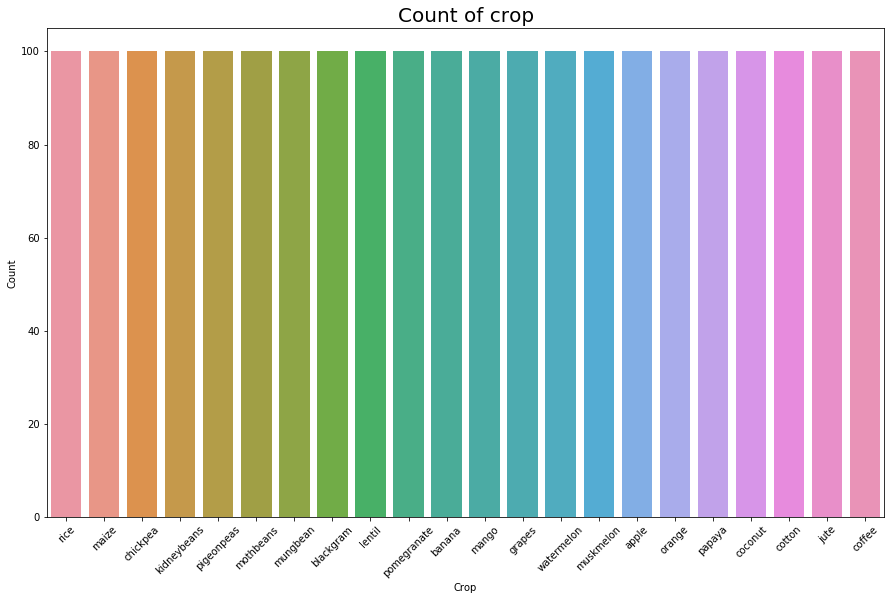

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.countplot(data=df, x='label')
ax.set(xlabel='Crop')
ax.set(ylabel='Count')
plt.xticks(rotation=45)

plt.title('Count of crop', fontsize = 20, color='black')
plt.show()

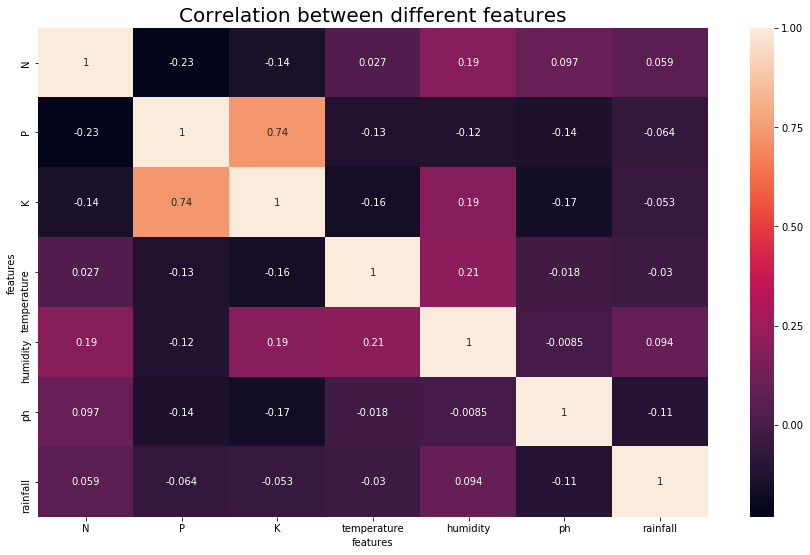

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(df.corr(), annot=True)
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features', fontsize = 20, color='black')
plt.show()

In [9]:
import warnings
warnings.filterwarnings("ignore")

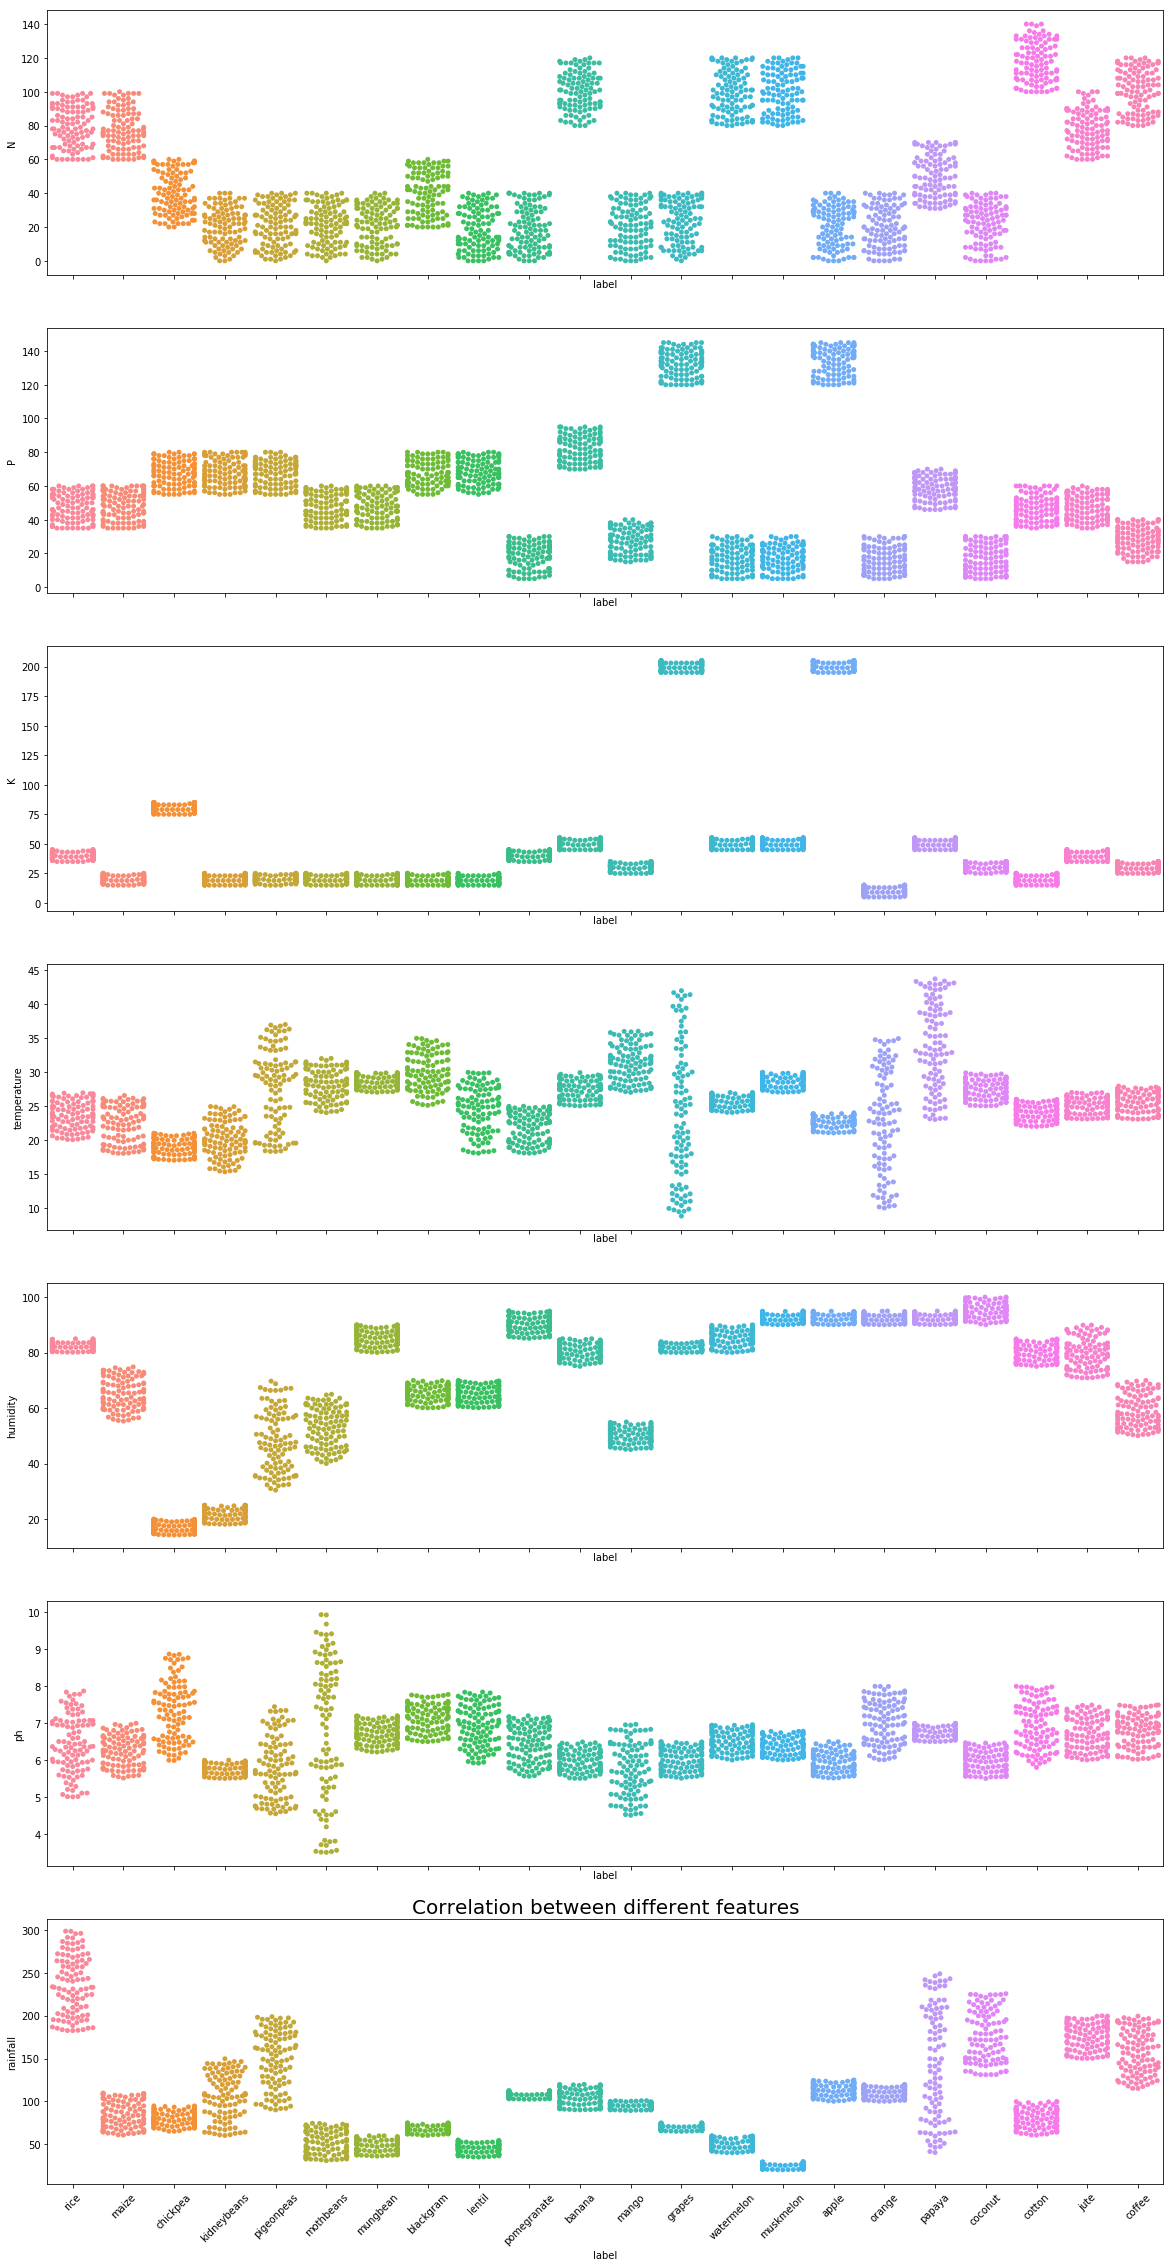

In [10]:
columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


fig, ax = plt.subplots(7, 1, figsize=(20, 40), sharex=True)

i = 0
for j in columns:
    sns.swarmplot(data=df, x='label', y=j, ax=ax[i])
    plt.xticks(rotation=45)
    i = i + 1

plt.title('Correlation between different features', fontsize = 20, color='black')
plt.show()

In [11]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [12]:
acc = []
model = []

In [13]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [14]:
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree

In [15]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  90.0
             precision    recall  f1-score   support

      apple       1.00      1.00      1.00        13
     banana       1.00      1.00      1.00        17
  blackgram       0.59      1.00      0.74        16
   chickpea       1.00      1.00      1.00        21
    coconut       0.91      1.00      0.95        21
     coffee       1.00      1.00      1.00        22
     cotton       1.00      1.00      1.00        20
     grapes       1.00      1.00      1.00        18
       jute       0.74      0.93      0.83        28
kidneybeans       0.00      0.00      0.00        14
     lentil       0.68      1.00      0.81        23
      maize       1.00      1.00      1.00        21
      mango       1.00      1.00      1.00        26
  mothbeans       0.00      0.00      0.00        19
   mungbean       1.00      1.00      1.00        24
  muskmelon       1.00      1.00      1.00        23
     orange       1.00      1.00      1.00        29
     papay

In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
score = cross_val_score(DecisionTree, features, target,cv=5)
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

In [18]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.990909090909091
             precision    recall  f1-score   support

      apple       1.00      1.00      1.00        13
     banana       1.00      1.00      1.00        17
  blackgram       1.00      1.00      1.00        16
   chickpea       1.00      1.00      1.00        21
    coconut       1.00      1.00      1.00        21
     coffee       1.00      1.00      1.00        22
     cotton       1.00      1.00      1.00        20
     grapes       1.00      1.00      1.00        18
       jute       0.88      1.00      0.93        28
kidneybeans       1.00      1.00      1.00        14
     lentil       1.00      1.00      1.00        23
      maize       1.00      1.00      1.00        21
      mango       1.00      1.00      1.00        26
  mothbeans       1.00      1.00      1.00        19
   mungbean       1.00      1.00      1.00        24
  muskmelon       1.00      1.00      1.00        23
     orange       1.00      1.00      1.00        29

In [19]:
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

In [20]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9431818181818182
             precision    recall  f1-score   support

      apple       1.00      1.00      1.00        13
     banana       1.00      1.00      1.00        17
  blackgram       0.79      0.94      0.86        16
   chickpea       1.00      1.00      1.00        21
    coconut       1.00      1.00      1.00        21
     coffee       1.00      1.00      1.00        22
     cotton       0.87      1.00      0.93        20
     grapes       1.00      1.00      1.00        18
       jute       0.88      0.79      0.83        28
kidneybeans       1.00      1.00      1.00        14
     lentil       0.88      0.96      0.92        23
      maize       1.00      0.86      0.92        21
      mango       1.00      1.00      1.00        26
  mothbeans       1.00      0.84      0.91        19
   mungbean       1.00      0.92      0.96        24
  muskmelon       1.00      1.00      1.00        23
     orange       1.00      1.00      1.00 

In [21]:
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.96818182, 0.93636364, 0.95681818, 0.95681818, 0.94772727])

In [22]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.990909090909091
             precision    recall  f1-score   support

      apple       1.00      1.00      1.00        13
     banana       1.00      1.00      1.00        17
  blackgram       0.94      1.00      0.97        16
   chickpea       1.00      1.00      1.00        21
    coconut       1.00      1.00      1.00        21
     coffee       1.00      1.00      1.00        22
     cotton       1.00      1.00      1.00        20
     grapes       1.00      1.00      1.00        18
       jute       0.90      1.00      0.95        28
kidneybeans       1.00      1.00      1.00        14
     lentil       1.00      1.00      1.00        23
      maize       1.00      1.00      1.00        21
      mango       1.00      1.00      1.00        26
  mothbeans       1.00      0.95      0.97        19
   mungbean       1.00      1.00      1.00        24
  muskmelon       1.00      1.00      1.00        23
     orange       1.00      1.00      1.00        29
     pap

C:\Users\mohit\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [23]:
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

In [24]:
#!pip install xgboost

In [25]:
#!pip install --upgrade xgboost

In [26]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(Xtrain,Ytrain)

predicted_values = XB.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

[12:18:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost's Accuracy is:  0.9931818181818182
             precision    recall  f1-score   support

      apple       1.00      1.00      1.00        13
     banana       1.00      1.00      1.00        17
  blackgram       1.00      1.00      1.00        16
   chickpea       1.00      1.00      1.00        21
    coconut       1.00      1.00      1.00        21
     coffee       0.96      1.00      0.98        22
     cotton       1.00      1.00      1.00        20
     grapes       1.00      1.00      1.00        18
       jute       1.00      0.93      0.96        28
kidneybeans       1.00      1.00      1.00        14
     lentil       0.96      1.00      0.98        23
      mai

C:\Users\mohit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [27]:
score = cross_val_score(XB,features,target,cv=5)
score

[12:18:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mohit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[12:18:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mohit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[12:18:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mohit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[12:18:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mohit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[12:18:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mohit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([0.99318182, 0.99318182, 0.99318182, 0.99090909, 0.99090909])

In [28]:
acc

[0.9,
 0.990909090909091,
 0.9431818181818182,
 0.990909090909091,
 0.9931818181818182]

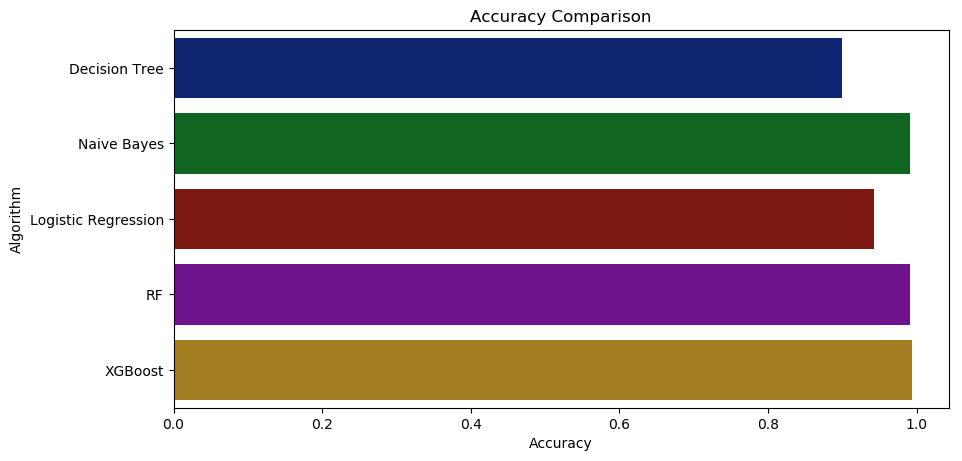

In [29]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [30]:
import numpy as np

In [33]:
data = np.array([[100,18, 30, 23.603016, 60.3, 20, 20]])
prediction = RF.predict(data)
print(prediction)

['muskmelon']


In [34]:
import pickle
XB_pkl_filename = 'XGBoost.pkl'
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
XB_Model_pkl.close()